In [1]:
import numpy
from matplotlib import pyplot as plt

Will need to integrate with an euler loop over a custom function to implement tipping

In [101]:
def droplet_size(pipe_diameter, surface_tension, g):
#     pipe_diameter = 0.001 #m
#     surface_tension = 72.75/1000 #N/m water-air at 21.5degC
#     g = 9.81 #m/s^2

    force_surface_tension = numpy.pi*pipe_diameter*surface_tension
    force_surface_tension

    mass_water_drop = force_surface_tension/g
#     print ("{0}kg or {1}g".format(mass_water_drop,mass_water_drop*1000))

#     Q = 0.001 #l/min flowrate
#     rho = 1 #kg/l

#     time_droplet = mass_water_drop/rho/Q   #kg / kg/l / l/min
#     print ("{0}min or {1}sec".format(time_droplet, time_droplet*60))
    
    return (mass_water_drop)

In [114]:
pipe_diameter = 0.001 #m
surface_tension = 72.75/1000 #N/m water-air at 21.5degC
g = 9.81 #m/s^2

In [115]:
mass_water_drop = droplet_size (pipe_diameter, surface_tension, g)
mass_water_drop

2.3297743684878434e-05

In [116]:
def droplet(dt, Q, V):
    """
    dt is the time interval of the euler loop
    Q is flow rate to droplet with units of time of dt - If dt is 2 seconds, Q must be in L/s
    V is previous volume of the droplet at time T-1 in L
    
    Returns Volume of droplet at T + dt
    """
    V_new = V + Q*dt
    return (V_new)

In [117]:
def droplet_fall(V_droplet, V_max = mass_water_drop):
    """
    Checks if the volume of the droplet is greater than the maximum allowed.
    If the droplet is larger than the maximum, reduced droplet size, and move fluid from droplet to the tank
    
    Returns the Volume of the Droplet, and the volume moved to the system
    """
    
    if V_droplet > V_max:
        V_addition = V_max
        V_droplet_new = V_droplet - V_max
        
        return (V_droplet_new, V_addition)
    
    else:
        return (V_droplet, 0)

In [120]:
start = 0 #min
end = 500 #min
steps = end*10000

span = numpy.linspace(start,end,steps)

dt = (end-start)/steps #min

Q = 0.001 #L/min

V_drop = [0]
V_tank = [0]

for t in span: #Euler Loop 
    
    drop_V = droplet(dt, Q, V_drop[-1])
    
    drop_V_new, tank_addition = droplet_fall(drop_V)
    
    V_drop.append(drop_V_new)
    
    V_tank.append(V_tank[-1] + tank_addition)

span = numpy.append(span, span[-1]+dt)

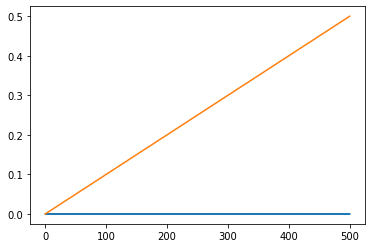

In [121]:
plt.plot(span, V_drop)
plt.plot(span, V_tank)